<a href="https://colab.research.google.com/github/dm-sap/dm-sap/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import matplotlib.pyplot as plt
import numpy as np    
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import math

In [58]:
def f1(E):
  x=0
  if 0.1<E and E<0.9 :
    x=1/E
  return x

def f2(E,mu,sigma):
  var=sigma**2
  return (1/(2*np.pi*var)**0.5)*np.e**(-(E-mu)**2/(2*var))

def f(E):
  a1=1
  a2=1.5
  return a1*f1(E)+a2*f2(E,1,0.01)

######################################

def g(E,sigma):
  var=sigma**2
  return (1/(2*np.pi*var)**0.5)*np.e**(-(E-1)**2/(2*var))


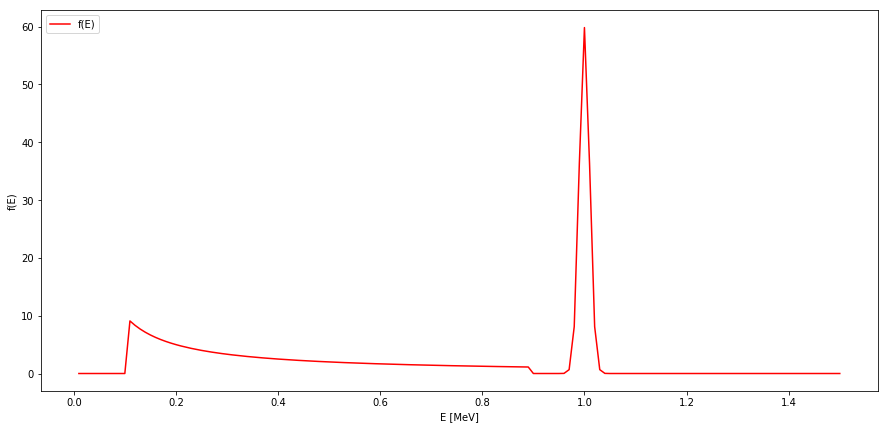

In [48]:
E=np.arange(0.01,1.51,0.01)
F=np.vectorize(f)
y=F(E)

####################################

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(E,y, label='f(E)', color= 'r')
ax.set_xlabel('E [MeV]')
ax.set_ylabel('f(E)')
ax.legend(loc=2)

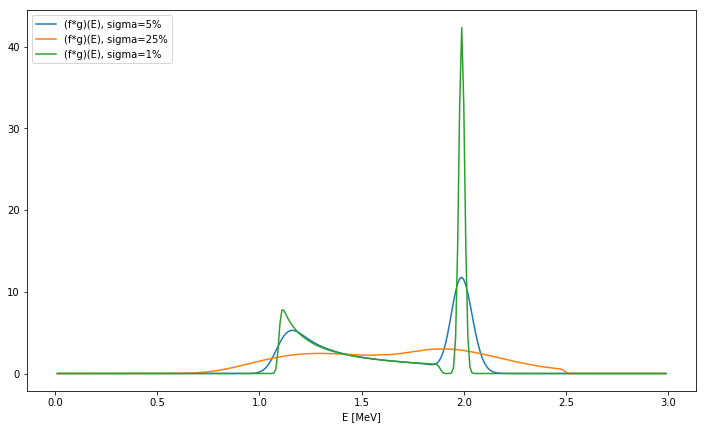

In [67]:
sigma1=0.05
sigma2=0.25
sigma3=0.01
####################################### Creazione array con i valori delle gaussiane a vari sigma
G=np.vectorize(g)
gaus1=G(E,sigma1*E**0.5)
gaus2=G(E,sigma2*E**0.5)
gaus3=G(E,sigma3*E**0.5)
####################################### Convoluzione con numpy.convolve()
con1=np.convolve(gaus1,y)
con2=np.convolve(gaus2,y)
con3=np.convolve(gaus3,y)
####################################### "Aggiustamento" dell'array di E per il plot
x=E
o=0.01
for i in range(0,len(con1)-len(E)):
  x=np.append(x,max(E)+o)
  o+=0.01

######################################

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(x,con1*0.01, label='(f*g)(E), sigma=5%')
ax.plot(x,con2*0.01, label='(f*g)(E), sigma=25%')
ax.plot(x,con3*0.01, label='(f*g)(E), sigma=1%')
ax.set_xlabel('E [MeV]')
ax.legend(loc=2)

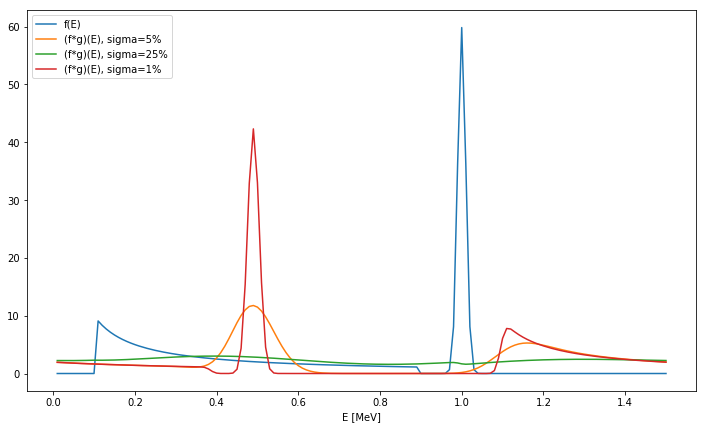

In [68]:
##################################### Convoluzione attraverso le Trasformate di Foutier con numpy.fft.fft() e antitrasformate con numpy.fft.ifft()
y_hat=np.fft.fft(y)

gaus1_hat=np.fft.fft(gaus1,norm='ortho')
T1_hat=y_hat*gaus1_hat
T1=np.fft.ifft(T1_hat,norm='ortho')

gaus2_hat=np.fft.fft(gaus2,norm='ortho')
T2_hat=y_hat*gaus2_hat
T2=np.fft.ifft(T2_hat,norm='ortho')

gaus3_hat=np.fft.fft(gaus3,norm='ortho')
T3_hat=y_hat*gaus3_hat
T3=np.fft.ifft(T3_hat,norm='ortho')

###############################################

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(E,y, label='f(E)')
ax.plot(E,T1*0.01, label='(f*g)(E), sigma=5%')
ax.plot(E,T2*0.01, label='(f*g)(E), sigma=25%')
ax.plot(E,T3*0.01, label='(f*g)(E), sigma=1%')
ax.set_xlabel('E [MeV]')
ax.legend(loc=2)